Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "YuhaoQian_13011456"
COLLABORATORS = "MeifangLi_13043390"

---
# Homework set 2

# Exercise 0
Write down the names + student ID of the people in your group.

YOUR ANSWER HERE
YuhaoQian_13011456
MeifangLi_13043390

Run the following cell to import the nessecary packages.

In [2]:
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

-----
# Exercise 1 (2.1 on the Exercise sheet)

##### NOTE: You may also submit Exercise 1 as a pdf of your handwritten solutions if you prefer. If so, indicate this where you would put your answers below

## (a) 1 point
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

YOUR ANSWER HERE

Our handwritten answer is submitted in a pdf.

## (b) 1 point
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

YOUR ANSWER HERE

Our handwritten answer is submitted in a pdf.

## (c) 2 points
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

YOUR ANSWER HERE

Our handwritten answer is submitted in a pdf.

----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

## (a) 2 points
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [3]:
def invert(A):
    #invert the matrix A
    # YOUR CODE HERE
    LU,PIV=la.lu_factor(A)
    column_number=A.shape[1]  
    e=np.zeros(column_number)
    inverse_matrix=[]
    for i in range(column_number):
        e[i]=1
        x=la.lu_solve((LU,PIV),e)
        if i==0:
            inverse_matrix=x
            e[i] = 0
        else:
            inverse_matrix = \
                np.column_stack((inverse_matrix, x))
            e[i] = 0

    return inverse_matrix


## (b) 1 point
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?
Give a short calculation/explanation for your answer.

YOUR ANSWER HERE


(i)We first use the fuction `scipy.linalg.lu_factor` to compute LU decompositon of a matrix $A$ with partial pivoting;  (ii)Then we use the function `scipy.linalg.lu_solve` to solve an equation system, $Ax = b$, given the pivoted LU decompositon of A;  (iii)For every column of Indetity matrix as b, we compute x and finally stack them together to get inverse matrix of A.   

When employing the pivoting strategy, the functions scan rows and search for the largest value in current column and interchange rows. Eliminating the first column will require n multiplications for n-1 rows (we do not need to consider the additions because of slight impacts on the complexity compared to multiplications).For the second column, we have n-1 multiplications for n-2 rows. Therefore, the total number of mutiplications required can be written as $\sum_{i=1}^{n-1} n(n+1)=\frac{1}{3}n^3-\frac{1}{3}n$ and the complexity becomes $O(n^3)$. Solving the resulting triangular system for a single right-hand-side vector (multiplied by permutation matrix) by forward and backsubstitution requires about $n^2$ multiplications. At last, (iii) takes another loop of (ii) to formulate inverse matrix, so the complexity would become $O(n^2*n=n^3)$. Thus, the whole complexity becomes $O(n^3)$.

## (c) 1 point
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

infi-norm of difference [0.0, 5.329070518200751e-15, 1.5702994460298214e-12, 1.2979626262676902e-09, 3.278316853538854e-07, 0.00047345929851871915, 0.2935427345582866, 730.4439617234748, 1641217.6508578947, 1533162062.927311, 1059231706303.5017, 629169098302521.1]


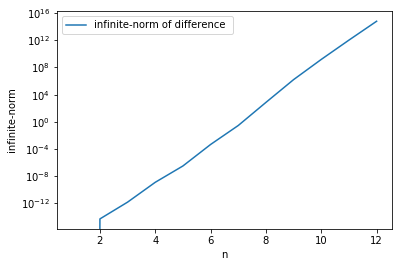

In [4]:
# YOUR CODE HERE
difference=[] # store infi norm of A1-A2
x=np.linspace(1,12,12,endpoint=True) #n=1,2,...,12
for i in range(1,13):
    hilbert = la.hilbert(i)  
    inv_hilbert = la.invhilbert(i) # true inverse Hilbert
    my_hilbert=invert(hilbert)  # my inverse Hilbert
    my_hilbert = my_hilbert.reshape((i, i)) 
    difference_hilbert=inv_hilbert-my_hilbert
    infi_norm_diff_hilbert=la.norm(difference_hilbert,ord=np.inf) #infi-norm A1-A2
    #difference.append(np.abs(infi_norm_estimate-infi_norm_real))
    difference.append(infi_norm_diff_hilbert)
print('infi-norm of difference',difference)
plt.semilogy(x,difference,label='infinite-norm of difference ')
plt.xlabel('n')
plt.ylabel('infinite-norm')
plt.legend()
plt.show()


## (d) 2 points
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

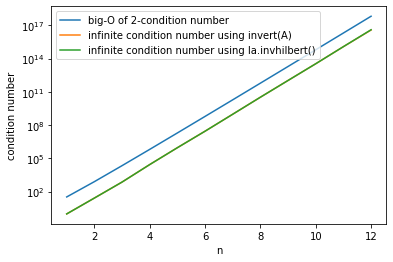

In [5]:
# YOUR CODE HERE
big_O=[]
cond_infi_defi_list=[]
cond_2_list=[] #Hilbert
cond_infi_list=[]

cond_2_invhilbert=[] #true inverse Hilbert
cond_infi_invhilbert=[]

cond_2_invert=[] #my inverse Hilbert
cond_infi_invert=[]

for i in range(1,13):
    hilbert = la.hilbert(i)
    inv_hilbert = la.invhilbert(i)
    my_hilbert=invert(hilbert)
    my_hilbert = my_hilbert.reshape((i, i))
    big_O.append((1+np.sqrt(2))**(4*i) / np.sqrt(i))
    
    # calculate&store 2-condition and infi-condition number of Hilbert 
    cond_2_list.append(LA.cond(hilbert,p=2))
    cond_infi_list.append(LA.cond(hilbert,p=np.inf))
    
    # calculate&store 2-condition and infi-condition number of INVERSE Hilbert
    cond_2_invhilbert.append(LA.cond(inv_hilbert,p=2))
    cond_infi_invhilbert_defi=la.norm(inv_hilbert,ord=np.inf)*la.norm(hilbert, ord=np.inf)
    cond_infi_invhilbert.append(cond_infi_invhilbert_defi)
    
    #calculate&store 2-condition and infi-condition number of MY INVERSE Hilbert
    cond_2_invert.append(LA.cond(my_hilbert,p=2))
    cond_infi_invert.append(LA.cond(my_hilbert,p=np.inf))
    
    cond_infi_defi=la.norm(my_hilbert,ord=np.inf)*la.norm(invert(my_hilbert), ord=np.inf)
    cond_infi_defi_list.append(cond_infi_defi)
    
plt.semilogy(x,big_O,label='big-O of 2-condition number')
plt.semilogy(x,cond_infi_defi_list,label='infinite condition number using invert(A)')
plt.semilogy(x,cond_infi_invhilbert,label='infinite condition number using la.invhilbert()')
plt.xlabel('n')
plt.ylabel('condition number')
plt.legend()
plt.show()

# #2-condition and infi-condition number of Hilbert
# plt.semilogy(x,cond_2_list,label='2-condition number')
# plt.semilogy(x,cond_infi_list,label='infi-condition number ')
# plt.xlabel('n')
# plt.title('Hilbert')
# plt.ylabel('condition number')
# plt.legend()
# plt.show()
# #2-condition and infi-condition number of INVERSE Hilbert
# plt.semilogy(x,cond_2_invhilbert,label='2-condition number')
# plt.semilogy(x,cond_infi_invhilbert,label='infi-condition number')
# plt.xlabel('n')
# plt.ylabel('condition number')
# plt.title('Inverse Hilbert')
# plt.legend()
# plt.show()
# #2-condition and infi-condition number of MY INVERSE Hilbert
# plt.semilogy(x,cond_2_invert,label='2-condition number')
# plt.semilogy(x,cond_infi_invert,label='infinite-condition number')
# plt.xlabel('n')
# plt.ylabel('condition number')
# plt.title('Inverse Hilbert using invert(A)')
# plt.legend()
# plt.show()



The $\infty$-condition number of true inverse Hilbert (using $la.invhilbert()$) and our inverse Hilbert (using $invert(A)$) grow similarly with $cond_2(H_n)$. These two $\infty$-condition numbers are very close. Thus, they do not have visiable different in the figure.